In [1]:
import pandas as pd
import os 

In [2]:
files = os.listdir()
files

['Untitled.ipynb',
 'test.csv',
 'train.csv',
 '.ipynb_checkpoints',
 'transactions.csv',
 'oil.csv',
 'holidays_events.csv',
 'sample_submission.csv',
 'stores.csv']

In [167]:
train = pd.read_csv('train.csv',index_col=0)
train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [168]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [169]:
oil = pd.read_csv('oil.csv',index_col=0)
oil.head()
merged = train.join(oil.fillna(method='bfill'),on='date')
merged.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14
1,2013-01-01,1,BABY CARE,0.0,0,93.14
2,2013-01-01,1,BEAUTY,0.0,0,93.14
3,2013-01-01,1,BEVERAGES,0.0,0,93.14
4,2013-01-01,1,BOOKS,0.0,0,93.14


In [170]:
stores = pd.read_csv('stores.csv',index_col=0)
stores.head()
merged = merged.join(stores,on='store_nbr')

In [171]:
holidays = pd.read_csv('holidays_events.csv')
holidays_local = holidays[holidays['locale']=='Local']
holidays_local['city'] = holidays_local['locale_name']
holidays_regional = holidays[holidays['locale']=='Regional']
holidays_national = holidays[holidays['locale']=='National']

In [172]:
holidays_local_merged = pd.merge(merged, holidays_local,  how='left', left_on=['date','city'], right_on = ['date','locale_name'])
holidays_regional_merged = pd.merge(merged, holidays_regional,  how='left', left_on=['date','state'], right_on = ['date','locale_name'])
holidays_national_merged = pd.merge(merged, holidays_national,  how='left', left_on=['date'], right_on = ['date'])


In [173]:
final_df = pd.DataFrame()
final_df = merged.copy()
#final_df = merged.copy()
#final_df.index = holidays_local_merged.index
#final_df['id'] = holidays_local_merged['id']
#final_df['store_nbr'] = holidays_local_merged['store_nbr']
#final_df['family'] = holidays_local_merged['family']
#final_df['onpromotion'] = holidays_local_merged['onpromotion']
#final_df['dcoilwtico'] = holidays_local_merged['dcoilwtico']
#final_df['city'] = merged['city']
#final_df['state'] = merged['state']
#final_df['type'] = holidays_local_merged['type_x']
#final_df['cluster'] = holidays_local_merged['cluster']
final_df

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
id,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6
3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6


In [174]:
holidays_local_merged

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city_x,state,type_x,cluster,type_y,locale,locale_name,description,transferred,city_y
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001147,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN
3001148,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN
3001149,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN
3001150,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
final_df['isHoliday'] = ((pd.notna(holidays_local_merged['type_y']) |(pd.notna(holidays_regional_merged['type_y'])))|(pd.notna(holidays_national_merged['type_y'])))


In [194]:
final_df['dayofyear'] = pd.DatetimeIndex(pd.to_datetime(final_df['date'])).day_of_year.values
final_df['weekofyear'] = pd.DatetimeIndex(pd.to_datetime(final_df['date'])).isocalendar().week.values
final_df['weekday'] = pd.DatetimeIndex(pd.to_datetime(final_df['date'])).weekday.values

In [201]:
final_df_preprocessed = final_df.copy()

ordinal_columns = ['family','city','state','type','isHoliday']
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
final_df_preprocessed[ordinal_columns]=enc.fit_transform(final_df_preprocessed [ordinal_columns])

In [202]:
final_df_preprocessed

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,isHoliday,dayofyear,weekofyear,weekday
id,,,,,,,,,,,,,,
0,2013-01-01,1,0.0,0.000,0,93.14,18.0,12.0,3.0,13,1.0,1,1,1
1,2013-01-01,1,1.0,0.000,0,93.14,18.0,12.0,3.0,13,1.0,1,1,1
2,2013-01-01,1,2.0,0.000,0,93.14,18.0,12.0,3.0,13,1.0,1,1,1
3,2013-01-01,1,3.0,0.000,0,93.14,18.0,12.0,3.0,13,1.0,1,1,1
4,2013-01-01,1,4.0,0.000,0,93.14,18.0,12.0,3.0,13,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,28.0,438.133,0,47.57,18.0,12.0,1.0,6,1.0,227,33,1
3000884,2017-08-15,9,29.0,154.553,1,47.57,18.0,12.0,1.0,6,1.0,227,33,1
3000885,2017-08-15,9,30.0,2419.729,148,47.57,18.0,12.0,1.0,6,1.0,227,33,1


In [203]:
X = final_df_preprocessed.iloc[:,[1,2,4,6,7,8,9,10,11,12,13]].values
Y = final_df_preprocessed.iloc[:,3].values

n_split = int(len(X)*0.8)

X_train,X_test = X[0:n_split],X[n_split:]
Y_train,Y_test = Y[0:n_split],Y[n_split:]

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
rfr=RandomForestRegressor(n_estimators=400,max_depth=12,max_features=5,verbose=1,n_jobs=6)
rfr.fit(X_train,Y_train)
print(rfr.score(X_train,Y_train))
print(rfr.score(X_test,Y_test))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   16.0s


KeyboardInterrupt: 

In [212]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_features=6, learning_rate=0.1, n_estimators=200,verbose=1)
gbr.fit(X_train,Y_train)
print(gbr.score(X_train,Y_train))
print(gbr.score(X_test,Y_test))

      Iter       Train Loss   Remaining Time 
         1      959979.8444            3.07m
         2      894687.5618            3.25m
         3      854734.4586            3.00m
         4      819861.1279            2.95m
         5      773280.4455            2.95m
         6      747066.0127            2.91m
         7      708415.2733            2.90m
         8      683668.1276            2.90m
         9      664158.7308            2.91m
        10      647545.7226            2.89m
        20      534023.8378            2.71m
        30      460583.7624            2.54m
        40      432191.6447            2.36m
        50      414111.8011            2.17m
        60      392802.0246            2.04m
        70      375591.5729            1.88m
        80      359788.2099            1.73m
        90      351304.7189            1.58m
       100      342151.4476            1.44m
       200      300584.2185            0.00s
0.7138031670032002
0.7653083024851806


In [ ]:
results = 

In [58]:
merged['state'].unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

In [5]:
sample = train[100000:]

In [6]:
sample

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-02-26,100000,15,EGGS,36.000,0
2013-02-26,100001,15,FROZEN FOODS,12.000,0
2013-02-26,100002,15,GROCERY I,1977.000,0
2013-02-26,100003,15,GROCERY II,10.000,0
2013-02-26,100004,15,HARDWARE,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [7]:
sample['family'].unique()

array(['EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD', 'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES',
       'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY',
       'DELI'], dtype=object)

In [8]:
sample['store_nbr'].unique()

array([15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  3,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,  7,  8,  9,  1, 10, 11,
       12, 13, 14])

<AxesSubplot:xlabel='date'>

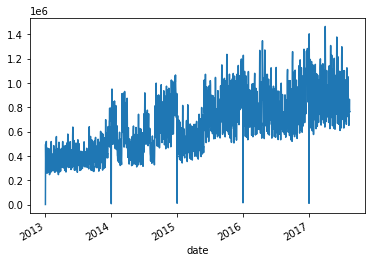

In [9]:
train.groupby(by='date').sum()['sales'].plot()

In [10]:
train[train['store_nbr']==9].groupby(by='date').sum()

,id,store_nbr,sales,onpromotion
date,,,,
2013-01-01,58245,297,0.000000,0
2013-01-02,117051,297,15867.484000,0
2013-01-03,175857,297,10431.719000,0
2013-01-04,234663,297,8085.159000,0
2013-01-05,293469,297,13057.110000,0
...,...,...,...,...
2017-08-11,98793519,297,15569.746000,279
2017-08-12,98852325,297,16901.506991,214
2017-08-13,98911131,297,18128.805000,261


<AxesSubplot:xlabel='date'>

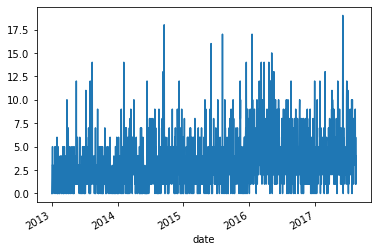

In [11]:
train[(train['family']=='AUTOMOTIVE') & (train['store_nbr']==1)]['sales'].plot()

<AxesSubplot:xlabel='date'>

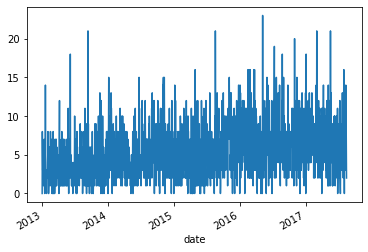

In [12]:
train[(train['family']=='AUTOMOTIVE') & (train['store_nbr']==2)]['sales'].plot()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
window = 14
train_df = train[train['family']=='GROCERY I']['sales'].groupby('date').sum()[:-30].copy()
test_df = train[train['family']=='GROCERY I']['sales'].groupby('date').sum()[-30:].copy()


In [17]:
model = ExponentialSmoothing(train_df,seasonal_periods=4*7,trend="add",seasonal="add")
res = model.fit()
pred = res.forecast(14)
pred.index = test_df.index
df = pd.DataFrame(test_df)
df['pred'] = pred
df.plot()
mean_squared_log_error(test_df,pred)

/Users/krzysiekissel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/krzysiekissel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/krzysiekissel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: Length mismatch: Expected axis has 14 elements, new values have 30 elements

C:\Users\krzys\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


C:\Users\krzys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='date'>

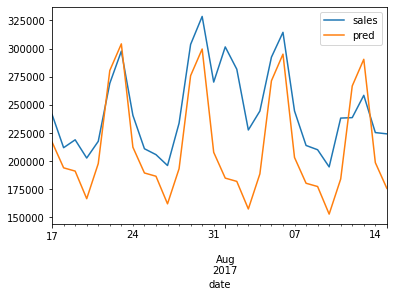

In [155]:
df

,sales,pred
date,,
2017-07-17,241417.015,NaN
2017-07-18,211924.156,NaN
2017-07-19,218927.014,NaN
2017-07-20,202736.576,NaN
2017-07-21,217576.952,NaN
2017-07-22,269126.244,NaN
2017-07-23,297691.697,NaN
2017-07-24,240691.265,NaN
2017-07-25,210986.016,NaN


<AxesSubplot:xlabel='date'>

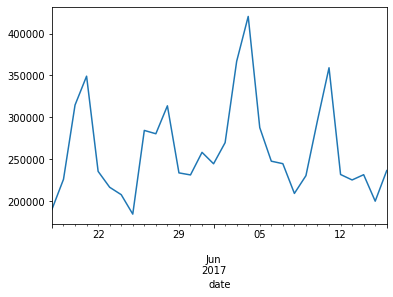

In [65]:
train[(train['family']=='GROCERY I')].groupby('date').sum()['sales'][-90:-60].plot()

# pomysł jest taki:
    - modelujemy poziom sprzedaży dla każdego towaru f(date,national_holidays,oil)
    - modelujemy poziom sprzedaży dla każdego sklepu f(date,holidays,stores,promo)
    - łączymy dwa modele

In [48]:
files = os.listdir()
files

['.ipynb_checkpoints',
 'holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv',
 'Untitled.ipynb']

In [21]:
df = pd.read_csv('oil.csv')
df.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [22]:
df = pd.read_csv('holidays_events.csv')
df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [19]:
df = pd.read_csv('stores.csv')
df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [52]:
test = pd.read_csv('test.csv')
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
